In [1]:
# https://www.geeksforgeeks.org/ao-algorithm-artificial-intelligence/

# Cost to find the AND and OR path
def Cost(H, condition, weight = 1):
	cost = {}
	if 'AND' in condition:
		AND_nodes = condition['AND']
		Path_A = ' AND '.join(AND_nodes)
		PathA = sum(H[node]+weight for node in AND_nodes)
		cost[Path_A] = PathA

	if 'OR' in condition:
		OR_nodes = condition['OR']
		Path_B =' OR '.join(OR_nodes)
		PathB = min(H[node]+weight for node in OR_nodes)
		cost[Path_B] = PathB
	return cost

# Update the cost
def update_cost(H, Conditions, weight=1):
	Main_nodes = list(Conditions.keys())
	Main_nodes.reverse()
	least_cost= {}
	for key in Main_nodes:
		condition = Conditions[key]
		print(key,':', Conditions[key],'>>>', Cost(H, condition, weight))
		c = Cost(H, condition, weight)
		H[key] = min(c.values())
		least_cost[key] = Cost(H, condition, weight)
	return least_cost

# Print the shortest path
def shortest_path(Start,Updated_cost, H):
	Path = Start
	if Start in Updated_cost.keys():
		Min_cost = min(Updated_cost[Start].values())
		key = list(Updated_cost[Start].keys())
		values = list(Updated_cost[Start].values())
		Index = values.index(Min_cost)

		# FIND MINIMIMUM PATH KEY
		Next = key[Index].split()
		# ADD TO PATH FOR OR PATH
		if len(Next) == 1:

			Start =Next[0]
			Path += '<--' +shortest_path(Start, Updated_cost, H)
		# ADD TO PATH FOR AND PATH
		else:
			Path +='<--('+key[Index]+') '

			Start = Next[0]
			Path += '[' +shortest_path(Start, Updated_cost, H) + ' + '

			Start = Next[-1]
			Path += shortest_path(Start, Updated_cost, H) + ']'

	return Path



H = {'A': -1, 'B': 5, 'C': 2, 'D': 4, 'E': 7, 'F': 9, 'G': 3, 'H': 0, 'I':0, 'J':0}

Conditions = {
'A': {'OR': ['B'], 'AND': ['C', 'D']},
'B': {'OR': ['E', 'F']},
'C': {'OR': ['G'], 'AND': ['H', 'I']},
'D': {'OR': ['J']}
}
# weight
weight = 1
# Updated cost
print('Updated Cost :')
Updated_cost = update_cost(H, Conditions, weight=1)
print('*'*75)
print('Shortest Path :\n',shortest_path('A', Updated_cost,H))


Updated Cost :
D : {'OR': ['J']} >>> {'J': 1}
C : {'OR': ['G'], 'AND': ['H', 'I']} >>> {'H AND I': 2, 'G': 4}
B : {'OR': ['E', 'F']} >>> {'E OR F': 8}
A : {'OR': ['B'], 'AND': ['C', 'D']} >>> {'C AND D': 5, 'B': 9}
***************************************************************************
Shortest Path :
 A<--(C AND D) [C<--(H AND I) [H + I] + D<--J]


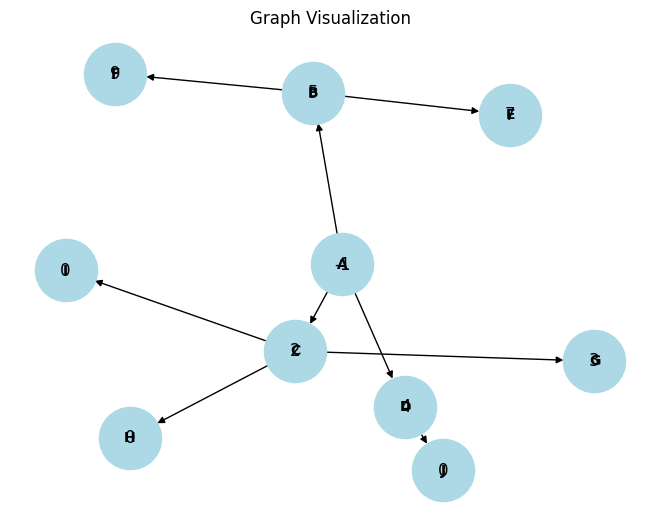

Updated Cost :
***************************************************************************
Shortest Path :
 A<--(C AND D) [C<--(H AND I) [H + I] + D<--J]


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Cost to find the AND and OR path
def Cost(H, condition, weight=1):
    cost = {}
    if 'AND' in condition:
        AND_nodes = condition['AND']
        Path_A = ' AND '.join(AND_nodes)
        PathA = sum(H[node]+weight for node in AND_nodes)
        cost[Path_A] = PathA

    if 'OR' in condition:
        OR_nodes = condition['OR']
        Path_B =' OR '.join(OR_nodes)
        PathB = min(H[node]+weight for node in OR_nodes)
        cost[Path_B] = PathB
    return cost

# Update the cost
def update_cost(H, Conditions, weight=1):
    Main_nodes = list(Conditions.keys())
    Main_nodes.reverse()
    least_cost= {}
    for key in Main_nodes:
        condition = Conditions[key]
        c = Cost(H, condition, weight)
        H[key] = min(c.values())
        least_cost[key] = Cost(H, condition, weight)
    return least_cost

# Print the shortest path
def shortest_path(Start, Updated_cost, H):
    Path = Start
    if Start in Updated_cost.keys():
        Min_cost = min(Updated_cost[Start].values())
        key = list(Updated_cost[Start].keys())
        values = list(Updated_cost[Start].values())
        Index = values.index(Min_cost)

        Next = key[Index].split()
        if len(Next) == 1:
            Start = Next[0]
            Path += '<--' + shortest_path(Start, Updated_cost, H)
        else:
            Path += '<--('+key[Index]+') '
            Start = Next[0]
            Path += '[' + shortest_path(Start, Updated_cost, H) + ' + '
            Start = Next[-1]
            Path += shortest_path(Start, Updated_cost, H) + ']'
    return Path

# Example Graph and Conditions
H = {'A': -1, 'B': 5, 'C': 2, 'D': 4, 'E': 7, 'F': 9, 'G': 3, 'H': 0, 'I': 0, 'J': 0}

Conditions = {
    'A': {'OR': ['B'], 'AND': ['C', 'D']},
    'B': {'OR': ['E', 'F']},
    'C': {'OR': ['G'], 'AND': ['H', 'I']},
    'D': {'OR': ['J']}
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes with their weights
for node, weight in H.items():
    G.add_node(node, weight=weight)

# Add edges based on conditions
for node, condition in Conditions.items():
    for path, nodes in condition.items():
        if path == 'AND':
            for n in nodes:
                G.add_edge(node, n)
        elif path == 'OR':
            for n in nodes:
                G.add_edge(node, n)

# Visualize the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
node_labels = nx.get_node_attributes(G, 'weight')
nx.draw_networkx_labels(G, pos, labels=node_labels)
plt.title("Graph Visualization")
plt.show()

# weight
weight = 1
# Updated cost
print('Updated Cost :')
Updated_cost = update_cost(H, Conditions, weight=1)
print('*'*75)
print('Shortest Path :\n', shortest_path('A', Updated_cost, H))
